In [129]:
#################### K-Means ####################
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#################### Hyperparameters
K = 3
epoch = 100
train_rate = 0.7
val_rate = 0.1
test_rate = 0.2



#################### Loading dataset and Preprocessing
df = pd.read_csv("data/Mall_Customers.csv")

G = set(df["Gender"])
gender = pd.DataFrame()

data = np.array(df)
M,N = np.shape(data)
c = 0

for item in G:
    idx = np.where(data[:, 1] == item)
    data[idx,1] = c
    c += 1

data = data.astype(float)


def normalisation(data):
    M = np.max(data, axis=0)
    m = np.min(data, axis=0)
    out = (data - m) / (M-m)
    return out


def standardisation(data):
    out = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
    return out


data = standardisation(data)


In [130]:
#################### Train_Validation_Test Split
M_train = int(np.ceil(train_rate * M)) 
M_val = int(np.ceil(val_rate * M))
M_test = M - (M_train + M_val)

idx = np.random.permutation(M)
train_idx = idx[:M_train] 
val_idx = idx[M_train: M_train+M_val]
test_idx = idx[M_train+M_val:]

data_train = data[train_idx, :]
data_val = data[val_idx, :]
data_test = data[test_idx, :]


In [131]:
#################### K-Means Model

def cluster(x):
    d = (C-x)**2
    s = np.sum(d, axis=1)
    out = np.argmin(s)
    return out


def distance(x,y):
    d = (x-y)**2
    out = np.sum(d)
    return out



C = np.random.rand(K,N)
WCSS_train = np.array([])
WCSS_val = np.array([])


for i in range(epoch):
    clus_train = np.apply_along_axis(cluster, 1, data_train)
    clus_train = np.reshape(clus_train, (M_train,1))
    new_data_train = np.hstack((data_train, clus_train))
    
    clus_val = np.apply_along_axis(cluster, 1, data_val)
    clus_val = np.reshape(clus_val, (M_val,1))
    new_data_val = np.hstack((data_val, clus_val))
    
    J_train = 0
    for c in range(K):
        idx = np.where(new_data_train[:, -1] == c)
        h = (1/len(idx)) * np.sum(data_train[idx], axis = 0)
        C[c,:] = h
        J_train += distance(data_train[idx], C[c])
    
    WCSS_train = np.append(WCSS_train, J_train)
        
    J_val = 0
    for c in range(K):
        idx = np.where(new_data_val[:, -1] == c)
        J_val += distance(data_val[idx], C[c])  
    
    WCSS_val = np.append(WCSS_val, J_val)
    
        

In [134]:
#################### Test and Validation
clus_test = np.apply_along_axis(cluster, 1, data_test)
clus_test = np.reshape(clus_test, (M_test,1))
new_data_test = np.hstack((data_test, clus_test))
    

array([[ 0.37239558,  0.88640526, -0.06100169,  0.24581112, -0.39597992,
         1.        ],
       [-0.16454688,  0.88640526,  2.091999  , -0.05954431,  0.18634349,
         1.        ],
       [ 1.15182818, -1.12815215,  0.22606507,  0.97103028, -1.17241113,
         1.        ],
       [-0.71881007,  0.88640526, -0.85043527, -0.55574689,  0.03105725,
         1.        ],
       [ 1.18646963,  0.88640526, -0.20453507,  1.00919971, -0.90066021,
         1.        ],
       [-0.5282821 ,  0.88640526, -0.49160182, -0.47940803, -0.12422899,
         1.        ],
       [-1.68877065,  0.88640526, -1.3528021 , -1.70082976, -1.71591298,
         1.        ],
       [ 1.01326239, -1.12815215, -0.34806844,  0.66567484, -1.91002079,
         1.        ],
       [ 1.11718674, -1.12815215,  0.80019859,  0.93286085, -0.93948177,
         1.        ],
       [-0.80541369, -1.12815215,  1.4460988 , -0.67025518,  0.38045129,
         1.        ],
       [ 1.55020485,  0.88640526, -0.20453507,  1.

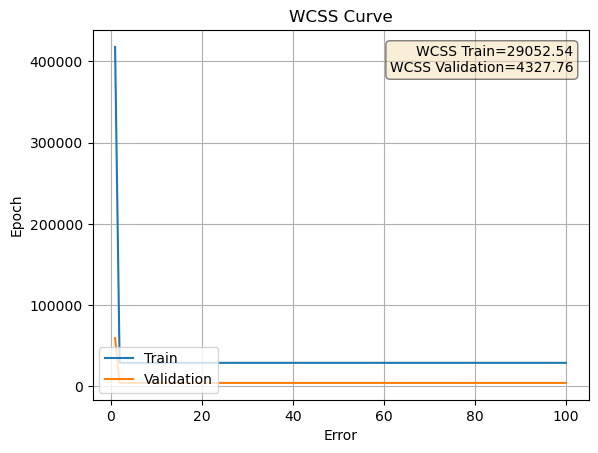

In [133]:
#################### WCSS Curve

fig, ax = plt.subplots()

plt.plot(range(1, epoch+1), WCSS_train, label='Train')
plt.plot(range(1, epoch+1), WCSS_val, label='Validation')
plt.title("WCSS Curve")
plt.xlabel("Error")
plt.ylabel("Epoch")
plt.grid()
plt.legend(loc="lower left")


txt = '\n'.join((
    r'WCSS Train=%.2f' % (WCSS_train[-1], ),
    r'WCSS Validation=%.2f' % (WCSS_val[-1], )
    ))

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

plt.text(0.97, 0.96, txt, transform=ax.transAxes, fontsize=10, verticalalignment='top', horizontalalignment='right', bbox=props)

plt.show()